In [1]:
import pandas
pandas.__version__

'1.2.2'

In [1]:
import pandas as pd
import numpy as np

# Series
A Pandas Series is a one-dimensional array of indexed data



In [165]:
data=pd.Series(np.linspace(1,17,5))

In [166]:
data

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
dtype: float64

In [167]:
data.values

array([ 1.,  5.,  9., 13., 17.])

In [168]:
data.index

RangeIndex(start=0, stop=5, step=1)

## 1. Accessing elements in series

In [169]:
data[1:3]

1    5.0
2    9.0
dtype: float64

## 2. Adding column names

In [170]:
data=pd.Series(np.linspace(1,20,5),index=['a','b','c','d','e'])

In [171]:
data

a     1.00
b     5.75
c    10.50
d    15.25
e    20.00
dtype: float64

## 3. Dictionary

In [181]:
Population_dict={'California':232323,'Texas':432423,'Maine':34234}

In [182]:
population=pd.Series(Population_dict)
population

California    232323
Texas         432423
Maine          34234
dtype: int64

In [183]:
pd.Series(5,index=[10,20,30])

10    5
20    5
30    5
dtype: int64

In [184]:
pd.Series({2:'a',3:'b',4:'c'},index=[3,2])

3    b
2    a
dtype: object

#### Note that in this case the Series is populated only with the explicitly identified keys

 # Dataframe

In [189]:
popluation=[234324,353245435,623546,24547]
area=['California','Maine','New York','Texas']
States=pd.DataFrame({'Populations':popluation,'Area':area},index=['a','b','c','d'])

In [190]:
States

,Populations,Area
a,234324,California
b,353245435,Maine
c,623546,New York
d,24547,Texas


In [191]:
States.columns

Index(['Populations', 'Area'], dtype='object')

In [192]:
States.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [195]:
States['Area']

a    California
b         Maine
c      New York
d         Texas
Name: Area, dtype: object

### 1. Constructing dataframe objects

In [198]:
pd.DataFrame(population,columns=['Population'])

,Population
California,232323
Texas,432423
Maine,34234


In [200]:
data=[{'a':i,'b':i**3} for i in range(1,5)]

In [201]:
data

[{'a': 1, 'b': 1}, {'a': 2, 'b': 8}, {'a': 3, 'b': 27}, {'a': 4, 'b': 64}]

In [203]:
pd.DataFrame(data,index=range(1,5))

,a,b
1,1,1
2,2,8
3,3,27
4,4,64


In [204]:
pd.Series(data)

0     {'a': 1, 'b': 1}
1     {'a': 2, 'b': 8}
2    {'a': 3, 'b': 27}
3    {'a': 4, 'b': 64}
dtype: object

#### Even if some keys in the dictionary are missing the pandas will fill them 'NaN'

In [205]:
data=[{'a':1,'b':2},{'b':4,'c':4}]

In [206]:
pd.DataFrame(data)

,a,b,c
0,1.0,2,NaN
1,NaN,4,4.0


In [207]:
np.random.rand(3,2)

array([[0.09924292, 0.27019805],
       [0.53750602, 0.17214751],
       [0.40985494, 0.28613589]])

In [208]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

In [209]:
pd.DataFrame(np.random.rand(3,2),columns=['foo','bar'],index=['a','b','c'])

,foo,bar
a,0.335267,0.545159
b,0.774474,0.551785
c,0.377089,0.114339


In [210]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'i4', 'f8')})

#### Here 'U10' translates to “Unicode string of maximum length 10,” 'i4' translates to “4-byte (i.e., 32 bit) integer,” and 'f8' translates to “8-byte (i.e., 64 bit) float.” We’ll discuss other options for these type codes in the following section.

# Data Selection in Series and DataFrame

In [211]:
data=pd.Series(np.linspace(1,10,4),index=['a','b','c','d'])

In [212]:
data

a     1.0
b     4.0
c     7.0
d    10.0
dtype: float64

In [213]:
data['b']

4.0

In [214]:
'a' in data


True

In [215]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [216]:
list(data.items())

[('a', 1.0), ('b', 4.0), ('c', 7.0), ('d', 10.0)]

In [217]:
data['e']=4

In [218]:
data

a     1.0
b     4.0
c     7.0
d    10.0
e     4.0
dtype: float64

In [219]:
data['a':'d']

a     1.0
b     4.0
c     7.0
d    10.0
dtype: float64

In [220]:
data[0:2]

a    1.0
b    4.0
dtype: float64

In [222]:
data[['a','e']] ##fancy indexing

a    1.0
e    4.0
dtype: float64

In [224]:
data[1] ##Explicit indexing

4.0

## 1. Slicing and Indexing

###  'loc' : The 'loc' attribute allows indexing and slicing that always references the explicit index

In [227]:
data=pd.Series(['a','b','c'],index=[1,3,5])

In [229]:
data

1    a
3    b
5    c
dtype: object

In [230]:
data.loc[1]

'a'

In [232]:
data[1:3] #implicit index when slicing

3    b
5    c
dtype: object

In [4]:
df=pd.read_csv(r'F:\IE Courses\Data Science\Database Design Hadoop\border.csv',sep=';')

In [5]:
df[1:4]

,Sr,Port_Name,State,Port_Code,Border,Date_,Measure,Value_,Latitude,Longitude
1,1,Van Buren,Maine,108,US-Canada Border,03-01-2019,Rail Containers Full,428.0,-67.94271,47.16207
2,2,Otay Mesa,California,2506,US-Mexico Border,03-01-2019,Trucks,81217.0,-117.05333,32.57333
3,3,Nogales,Arizona,2604,US-Mexico Border,03-01-2019,Trains,62.0,-110.93361,31.34028


## 'iloc' - The 'iloc' command allows indexing and slicing that always references the implicit Python-style index

In [239]:
data.iloc[1]

'b'

In [240]:
df.iloc[1]

Sr                              1
Port_Name               Van Buren
State                       Maine
Port_Code                     108
Border           US-Canada Border
Date_         2019-03-01 00:00:00
Measure      Rail Containers Full
Value_                        428
Latitude                 -67.9427
Longitude                 47.1621
Name: 1, dtype: object

In [241]:
data.iloc[1:3]

3    b
5    c
dtype: object

In [242]:
df.iloc[1:3]

,Sr,Port_Name,State,Port_Code,Border,Date_,Measure,Value_,Latitude,Longitude
1,1,Van Buren,Maine,108,US-Canada Border,2019-03-01,Rail Containers Full,428.0,-67.94271,47.16207
2,2,Otay Mesa,California,2506,US-Mexico Border,2019-03-01,Trucks,81217.0,-117.05333,32.57333


In [245]:
df.iloc[:8,4:8]

,Border,Date_,Measure,Value_
0,US-Mexico Border,2019-03-01,Trucks,34447.0
1,US-Canada Border,2019-03-01,Rail Containers Full,428.0
2,US-Mexico Border,2019-03-01,Trucks,81217.0
3,US-Mexico Border,2019-03-01,Trains,62.0
4,US-Canada Border,2019-03-01,Personal Vehicle Passengers,16377.0
5,US-Canada Border,2019-03-01,Trucks,179.0
6,US-Canada Border,2019-03-01,Bus Passengers,1054.0
7,US-Mexico Border,2019-03-01,Truck Containers Empty,1808.0


In [246]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})

In [247]:
data=pd.DataFrame({'Area':area,'Population':pop})

In [248]:
data

,Area,Population
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [249]:
data['Area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area, dtype: int64

In [250]:
type(data['Area'])

pandas.core.series.Series

#### the individual Series that make up the columns of the dataframe can be accessed via dictionary style indexing of the column

In [252]:
data.Area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area, dtype: int64

In [253]:
type(data.Area)

pandas.core.series.Series

In [268]:
data['Density']=data['Population']/data['Area']

In [269]:
data

,Area,Population,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


## DataFrame as two-dimensional array

In [270]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [271]:
type(data.values)

numpy.ndarray

In [272]:
data.values[:,1]

array([38332521., 26448193., 19651127., 19552860., 12882135.])


##### We can Transpose the full dataframe to swap rows and columns

In [273]:
data.T

,California,Texas,New York,Florida,Illinois
Area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
Population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
Density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [274]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [275]:
data['California':'New York']

,Area,Population,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [276]:
data[0:3]

,Area,Population,Density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [277]:

data[data.Density>100]

,Area,Population,Density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


# Ufuncs: Index Preservation

In [1]:
##help(np.random.RandomState)

In [279]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))

In [281]:
rng

RandomState(MT19937) at 0x227AC196A98

In [282]:
ser

0    6
1    3
2    7
3    4
dtype: int32

In [283]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


#### Any NumPy ufunc will work on Pandas Series and DataFrame objects

In [284]:
np.exp(1)

2.718281828459045

In [285]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [286]:
np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [287]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [289]:
C=A+B

In [290]:
C

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [293]:
C.fillna(0)

0    0.0
1    5.0
2    9.0
3    0.0
dtype: float64

In [297]:
C.fillna(np.mean(C))  ####fill na values with mean values

0    7.0
1    5.0
2    9.0
3    7.0
dtype: float64

In [298]:
list('AB')

['A', 'B']

In [299]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [300]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [301]:
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [302]:
A.mean()

A    3.0
B    6.0
dtype: float64

In [303]:
A

,A,B
0,1,11
1,5,1


In [306]:
A.stack().mean() 

4.5

#### stack() includes all the values in the dataframe

In [307]:
C=A+B

In [308]:
C

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [309]:
C.fillna(A.stack().mean())

,A,B,C
0,1.0,15.0,4.5
1,13.0,6.0,4.5
2,4.5,4.5,4.5


In [310]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [311]:
A-A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [312]:
A[0]

array([3, 8, 2, 4])

## Null Values in Pandas

### isnull() : Generate a Boolean mask indicating missing value
### notnull() : Opposite of isnull()
### dropna() : Return a filtered version of the data
### fillna() : Return a copy of the data with missing values filled or imputed

In [313]:
data=pd.Series([1,np.nan,'hello', None])

In [314]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [315]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [316]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [318]:
data.isnull().sum()

2

In [319]:
data.dropna()

0        1
2    hello
dtype: object

In [320]:
df = pd.DataFrame([[1, np.nan, 2],
[2, 3, 5],
[np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [321]:
df.dropna()

,0,1,2
1,2.0,3.0,5


#### It shows that the dropna drop either full rows or full columns

#### but the default the dropna only drops the rows

In [322]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


### But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters, which allow fine control of the number of nulls to allow through.

In [323]:
df[3]=np.nan

In [324]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [325]:
df.dropna(axis='columns',how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


### for finer-control the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept

In [326]:
df.dropna(axis='rows',thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### the first and last row has been dropped because they contain only two non-null values

## Filling null values

In [327]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

### we can specify 'forward-fill' to propogate the previous values forward

In [329]:
help(data.fillna)

Help on method fillna in module pandas.core.series:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs) method of pandas.core.series.Series instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index'}
        Axis along which to fill missing values.
    inplace : bool, defa

In [330]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

### we can also specify a back-fill to propagate the next values backwards

In [332]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [345]:
data.fillna(method='pad')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

# Hierarchical Indexing

In [333]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [335]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [341]:
pop[('California',2000)]

33871648

In [342]:
pop.index

Index([('California', 2000), ('California', 2010),   ('New York', 2000),
         ('New York', 2010),      ('Texas', 2000),      ('Texas', 2010)],
      dtype='object')

In [343]:
pop[[i for i in pop.index if i[1]==2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

## Generally 'Pandas MultiIndex' is better way

In [346]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [347]:
help(pd.MultiIndex.from_tuples)

Help on method from_tuples in module pandas.core.indexes.multi:

from_tuples(tuples, sortorder=None, names=None) method of builtins.type instance
    Convert list of tuples to MultiIndex.
    
    Parameters
    ----------
    tuples : list / sequence of tuple-likes
        Each tuple is the index of one row/column.
    sortorder : int or None
        Level of sortedness (must be lexicographically sorted by that
        level).
    names : list / sequence of str, optional
        Names for the levels in the index.
    
    Returns
    -------
    index : MultiIndex
    
    See Also
    --------
    MultiIndex.from_arrays : Convert list of arrays to MultiIndex.
    MultiIndex.from_product : Make a MultiIndex from cartesian product
                              of iterables.
    MultiIndex.from_frame : Make a MultiIndex from a DataFrame.
    
    Examples
    --------
    >>> tuples = [(1, 'red'), (1, 'blue'),
    ...           (2, 'red'), (2, 'blue')]
    >>> pd.MultiIndex.from_tuples(

In [348]:
pop=pop.reindex(index)

In [349]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [354]:
pop['California']

2000    33871648
2010    37253956
dtype: int64

In [355]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

## Stacking and Unstacking Dataframe

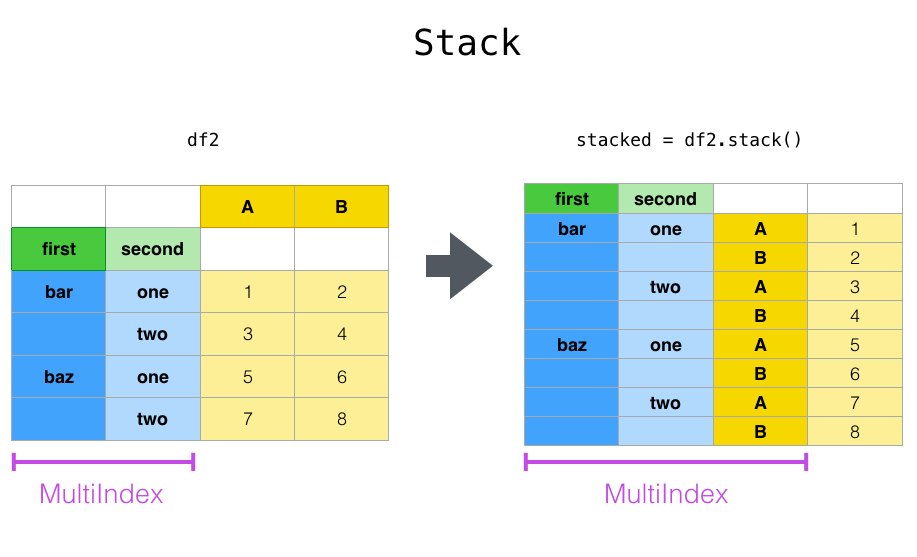

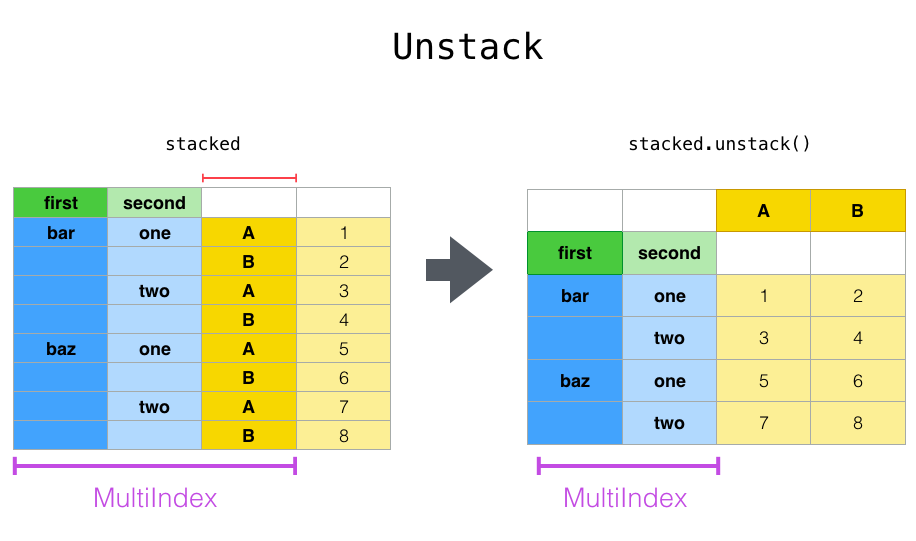

In [359]:
pop=pop.unstack()
pop

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


## Stacking Dataframe

In [364]:
pop=pop.stack()
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [365]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,4687374, 4318033,5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [366]:
f_u18=pop_df['under18']/pop_df['total']
f_u18

California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64

In [367]:
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


In [373]:
a=np.array([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

In [382]:
a[0,:]

array(['a', 'a', 'b', 'b'], dtype='<U1')

In [383]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [384]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [385]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [387]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Naming Multi-Index

In [392]:
pop.index.names=['State','Year']

In [411]:
pop

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [417]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

In [418]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [419]:
data

array([[45. , 37.3, 45. , 36. , 31. , 35.4],
       [26. , 38.9, 48. , 36.5, 32. , 36.3],
       [51. , 37.6, 33. , 34.6, 30. , 37.9],
       [38. , 37.6, 47. , 38.4, 28. , 37.4]])

In [420]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.3  45.0  36.0  31.0  35.4
     2      26.0  38.9  48.0  36.5  32.0  36.3
2014 1      51.0  37.6  33.0  34.6  30.0  37.9
     2      38.0  37.6  47.0  38.4  28.0  37.4

In [427]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      45.0  36.0
     2      48.0  36.5
2014 1      33.0  34.6
     2      47.0  38.4

## Indexing and Slicing in MultiIndex

In [429]:
pop

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [430]:
pop['California',2000]

33871648

In [431]:
pop['California']

Year
2000    33871648
2010    37253956
dtype: int64

In [432]:
pop.loc['California']

Year
2000    33871648
2010    37253956
dtype: int64

In [433]:
pop.loc['California':'New York']

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [434]:
pop['California':'New York']

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [435]:
pop[:,2000]

State
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [436]:
pop[pop > 22000000]

State       Year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [437]:
pop[['California', 'Texas']]

State       Year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

# Multiply indexed DataFrames

In [438]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.3  45.0  36.0  31.0  35.4
     2      26.0  38.9  48.0  36.5  32.0  36.3
2014 1      51.0  37.6  33.0  34.6  30.0  37.9
     2      38.0  37.6  47.0  38.4  28.0  37.4

In [439]:
health_data['Guido','HR']

year  visit
2013  1        45.0
      2        48.0
2014  1        33.0
      2        47.0
Name: (Guido, HR), dtype: float64

In [440]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  37.3
     2      26.0  38.9

In [441]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        45.0
      2        26.0
2014  1        51.0
      2        38.0
Name: (Bob, HR), dtype: float64

In [443]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  37.3
     2      26.0  38.9

In [446]:
health_data.iloc[:3, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      45.0  37.3
     2      26.0  38.9
2014 1      51.0  37.6

In [447]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        45.0
      2        26.0
2014  1        51.0
      2        38.0
Name: (Bob, HR), dtype: float64

## Rearranging Multi-Indices

In [448]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.870153
      2      0.150969
c     1      0.728918
      2      0.137983
b     1      0.703395
      2      0.147793
dtype: float64

In [457]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [458]:
data = data.sort_index()
data

char  int
a     1      0.870153
      2      0.150969
b     1      0.703395
      2      0.147793
c     1      0.728918
      2      0.137983
dtype: float64

In [459]:
data['a':'b']

char  int
a     1      0.870153
      2      0.150969
b     1      0.703395
      2      0.147793
dtype: float64

### It is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [460]:
pop.unstack()

Year,2000,2010
State,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [461]:
pop.unstack(level=0)

State,California,New York,Texas
Year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [462]:
pop.unstack(level=1)

Year,2000,2010
State,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [463]:
pop.reset_index(name=' Population')

,State,Year,Population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [464]:
pop

State       Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Data Aggregations on Multi-Indices

In [465]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  37.3  45.0  36.0  31.0  35.4
     2      26.0  38.9  48.0  36.5  32.0  36.3
2014 1      51.0  37.6  33.0  34.6  30.0  37.9
     2      38.0  37.6  47.0  38.4  28.0  37.4

In [466]:
health_data.mean()

subject  type
Bob      HR      40.000
         Temp    37.850
Guido    HR      43.250
         Temp    36.375
Sue      HR      30.250
         Temp    36.750
dtype: float64

In [469]:
health_data['Bob'].mean()

type
HR      40.00
Temp    37.85
dtype: float64

In [474]:
health_data.index

MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [475]:
health_data.columns

MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])

In [476]:
data_mean=health_data.mean(level='year')

In [477]:
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     35.5  38.1  46.5  36.25  31.5  35.85
2014     44.5  37.6  40.0  36.50  29.0  37.65

In [481]:
health_data.mean(level='visit')

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
visit                                         
1        48.0  37.45  39.0  35.30  30.5  36.65
2        32.0  38.25  47.5  37.45  30.0  36.85

### Pandas has built-in data aggregation methods, such as mean(), sum(), and max(). For hierarchically indexed data, these can be passed a level parameter that controls which subset of the data the aggregate is computed on.

# Append and Concat 

In [482]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [484]:
np.concatenate([x,y,z],axis=0)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [485]:
np.concatenate([x,y,z],axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [497]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

#### axis keyword that allows you to specify the axis along which the result will be concatenated

In [498]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=0)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [504]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])

In [505]:
ser1

1    A
2    B
3    C
dtype: object

In [506]:
ser2

4    D
5    E
6    F
dtype: object

In [507]:
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [508]:
pd.concat([ser1,ser2],axis=1)

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


### Ignoring the index. Sometimes the index itself does not matter, and you would prefer it to simply be ignored. You can specify this option using the ignore_index flag. With this set to True, the concatenation will create a new integer index for the resulting

In [509]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})

In [510]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [511]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [514]:

df1.merge(df2,how='inner',on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [520]:
df3=pd.concat([df1,df2],axis=1)
df3

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [521]:
pd.concat([df1,df2],axis=0)

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,employee,group,hire_date
0,Bob,Accounting,NaN
1,Jake,Engineering,NaN
2,Lisa,Engineering,NaN
3,Sue,HR,NaN
0,Lisa,NaN,2004.0
1,Bob,NaN,2008.0
2,Jake,NaN,2012.0
3,Sue,NaN,2014.0


### Many to one join

In [522]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})

In [523]:
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [526]:
pd.merge(df3,df4)

,employee,group,employee,hire_date,supervisor
0,Bob,Accounting,Lisa,2004,Carly
1,Jake,Engineering,Bob,2008,Guido
2,Lisa,Engineering,Jake,2012,Guido
3,Sue,HR,Sue,2014,Steve


### Many to Many join

In [527]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})


In [528]:
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [530]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


### left_on and right_on keyword

In [531]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})

In [533]:
print(df1)
print(df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [536]:
pd.merge(df1, df3, left_on="employee", right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [538]:
pd.merge(df3, df1, left_on="name", right_on="employee")

,name,salary,employee,group
0,Bob,70000,Bob,Accounting
1,Jake,80000,Jake,Engineering
2,Lisa,120000,Lisa,Engineering
3,Sue,90000,Sue,HR


In [539]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


### You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge():

In [542]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [543]:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [545]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])

In [546]:
df6

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


In [547]:
df7

,name,drink
0,Mary,wine
1,Joseph,beer


In [554]:
pd.merge(df6,df7,how='outer',on='name')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [555]:
pd.merge(df6,df7,how='inner',on='name')

,name,food,drink
0,Mary,bread,wine


In [556]:
pd.merge(df6,df7,how='left',on='name')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [557]:
pd.merge(df6,df7,how='right',on='name')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


In [588]:
pop=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
areas=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')
abbrevs=pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')

In [589]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [590]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [591]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [592]:
merged=pd.merge(pop,abbrevs,left_on='state/region',right_on='abbreviation')

In [593]:
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [585]:
merged.drop('abbreviation',1)
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [594]:
merged.isnull().any()

state/region    False
ages            False
year            False
population      False
state           False
abbreviation    False
dtype: bool

In [640]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state,abbreviation


### To find the particular row for missing values

In [595]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array([], dtype=object)

In [600]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population      False
state           False
abbreviation    False
dtype: bool

In [596]:
final = pd.merge(merged, areas, on='state', how='left')

In [598]:
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423
1,AL,total,2012,4817528.0,Alabama,AL,52423
2,AL,under18,2010,1130966.0,Alabama,AL,52423
3,AL,total,2010,4785570.0,Alabama,AL,52423
4,AL,under18,2011,1125763.0,Alabama,AL,52423


In [599]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
abbreviation     False
area (sq. mi)    False
dtype: bool

In [605]:
df[df.isnull().any()]

C:\Users\Kanishk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN


In [607]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,AL,52423
91,AK,total,2010,713868.0,Alaska,AK,656425
101,AZ,total,2010,6408790.0,Arizona,AZ,114006
189,AR,total,2010,2922280.0,Arkansas,AR,53182
197,CA,total,2010,37333601.0,California,CA,163707


In [608]:
data2010.set_index('state',inplace=True)

In [644]:
data2010.head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
Alabama,AL,total,2010,4785570.0,AL,52423
Alaska,AK,total,2010,713868.0,AK,656425
Arizona,AZ,total,2010,6408790.0,AZ,114006
Arkansas,AR,total,2010,2922280.0,AR,53182
California,CA,total,2010,37333601.0,CA,163707


# Sorting Values in Pandas

In [610]:
help(data2010.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
      

In [612]:
data2010.sort_values(by='state').head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
Alabama,AL,total,2010,4785570.0,AL,52423
Alaska,AK,total,2010,713868.0,AK,656425
Arizona,AZ,total,2010,6408790.0,AZ,114006
Arkansas,AR,total,2010,2922280.0,AR,53182
California,CA,total,2010,37333601.0,CA,163707


In [617]:
data2010.sort_index().head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
Alabama,AL,total,2010,4785570.0,AL,52423
Alaska,AK,total,2010,713868.0,AK,656425
Arizona,AZ,total,2010,6408790.0,AZ,114006
Arkansas,AR,total,2010,2922280.0,AR,53182
California,CA,total,2010,37333601.0,CA,163707


In [619]:
data2010.sort_values(by='population',ascending=False).head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
California,CA,total,2010,37333601.0,CA,163707
Texas,TX,total,2010,25245178.0,TX,268601
New York,NY,total,2010,19398228.0,NY,54475
Florida,FL,total,2010,18846054.0,FL,65758
Illinois,IL,total,2010,12839695.0,IL,57918


# Simple Aggregation in Pandas

In [620]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [622]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [623]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [624]:
ser.sum()

2.811925491708157

In [625]:
ser.mean()

0.5623850983416314

In [626]:
df = pd.DataFrame({'A': rng.rand(5),
'B': rng.rand(5)})

In [627]:
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [628]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [633]:
df.mean(axis=1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [636]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [638]:
planets[planets.isnull()].head()

,method,number,orbital_period,mass,distance,year
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [642]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

## Aggregation and Grouping

#### computing aggregations like sum(),mean(), min() and max()

In [7]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape


(1035, 6)

In [8]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [9]:
rng=np.random.RandomState(42)
ser=pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [10]:
ser.sum(),ser.mean()

(2.811925491708157, 0.5623850983416314)

In [11]:
df = pd.DataFrame({'A': rng.rand(5),
'B': rng.rand(5)})

In [12]:
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [13]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [14]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [23]:
planets[planets.isna()].sum()

method            0.0
number            0.0
orbital_period    0.0
mass              0.0
distance          0.0
year              0.0
dtype: float64

In [24]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy Operation

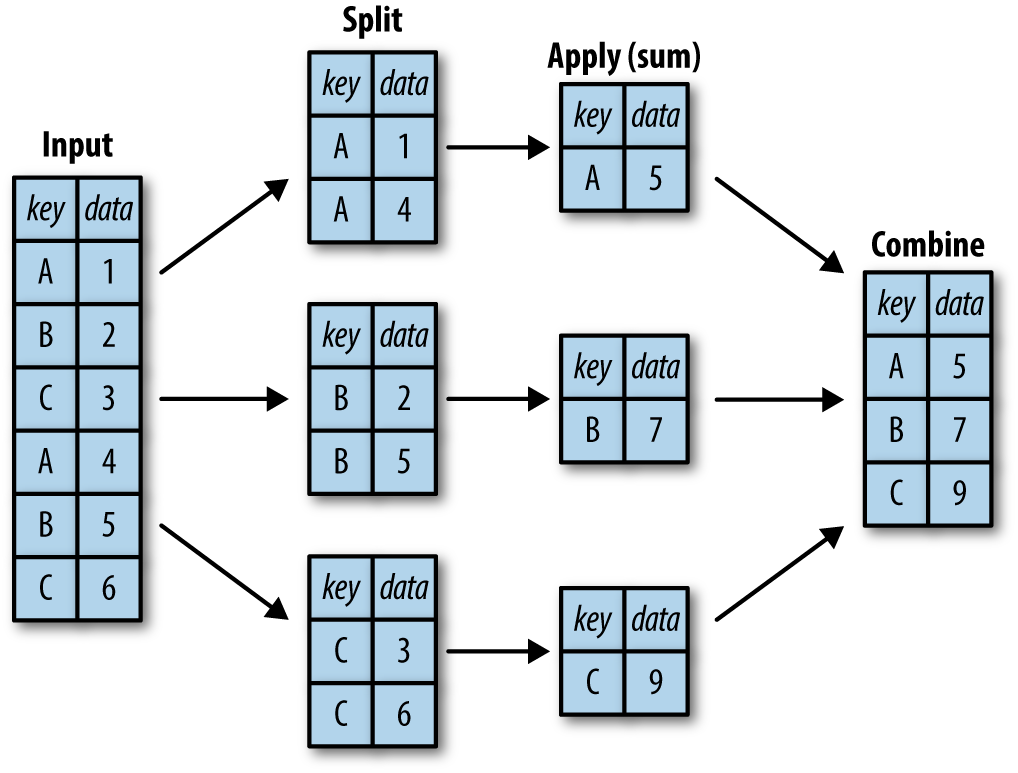

#### • The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.
#### • The apply step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
#### • The combine step merges the results of these operations into an output array.

In [25]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [26]:
help(df.groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Group DataFrame or Series using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine t

In [31]:
df.groupby(by='key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [35]:
df.groupby(by='key').sum()

,data
key,
A,3
B,5
C,7


In [40]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [42]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [45]:
planets.groupby('method')['orbital_period'].sum()

method
Astrometry                       1.262360e+03
Eclipse Timing Variations        4.276480e+04
Imaging                          1.418973e+06
Microlensing                     2.207500e+04
Orbital Brightness Modulation    2.127920e+00
Pulsar Timing                    3.671511e+04
Pulsation Timing Variations      1.170000e+03
Radial Velocity                  4.553151e+05
Transit                          8.377523e+03
Transit Timing Variations        2.393505e+02
Name: orbital_period, dtype: float64

#### Iteration over groups. The GroupBy object supports direct iteration over the groups,returning each group as a Series or DataFrame:

In [47]:
for (method, group) in planets.groupby('method'):
     print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [49]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

## Aggregate, filter, transform and apply

In [51]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,9
1,B,1,2
2,C,2,6
3,A,3,3
4,B,4,8
5,C,5,2


### Aggregation. We’re now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a quick example combining all these:

In [52]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3      6   9
B       1    2.5   4     2      5   8
C       2    3.5   5     2      4   6

In [53]:
df.groupby('key').aggregate({'data1': 'min',
'data2': 'max'})

,data1,data2
key,,
A,0,9
B,1,8
C,2,6


### Filtering. A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [60]:
def filter_func(x):
    return x['data2'].std()>4


df.groupby('key').std()

,data1,data2
key,,
A,2.12132,4.242641
B,2.12132,4.242641
C,2.12132,2.828427


In [58]:
df.groupby('key').filter(filter_func)

,key,data1,data2
0,A,0,9
1,B,1,2
3,A,3,3
4,B,4,8


In [61]:
df

,key,data1,data2
0,A,0,9
1,B,1,2
2,C,2,6
3,A,3,3
4,B,4,8
5,C,5,2


### Transformation. While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [63]:
df.groupby('key').transform(lambda x: x-x.mean())

,data1,data2
0,-1.5,3.0
1,-1.5,-3.0
2,-1.5,2.0
3,1.5,-3.0
4,1.5,3.0
5,1.5,-2.0


### The apply() method. The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar; the combine operation will be tailored to the type of output returned.

In [70]:
def norm(x):
    x['data1']/=x['data2'].sum()
    return x
df.groupby('key').apply(norm)

,key,data1,data2
0,A,0.000,9
1,B,0.100,2
2,C,0.250,6
3,A,0.250,3
4,B,0.400,8
5,C,0.625,2


In [71]:
df.groupby('key').apply(lambda x:norm(x))

,key,data1,data2
0,A,0.000,9
1,B,0.100,2
2,C,0.250,6
3,A,0.250,3
4,B,0.400,8
5,C,0.625,2


### A dictionary or series mapping index to group

In [74]:
df2=df.set_index('key')

In [75]:
df2

,data1,data2
key,,
A,0,9
B,1,2
C,2,6
A,3,3
B,4,8
C,5,2


In [78]:
mapping={'A': 'vowel','B':'consonant','C':'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,18
vowel,3,12


In [88]:
df2.groupby([str.lower,mapping]).mean()

,,data1,data2
a,vowel,1.5,6
b,consonant,2.5,5
c,consonant,3.5,4


In [79]:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,6
b,2.5,5
c,3.5,4


In [80]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [81]:
decade=10 * (planets['year']//10)
decade=decade.astype(str) + 's'
decade.name='decade'

In [87]:
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### The pivot table takes simple columnwise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data


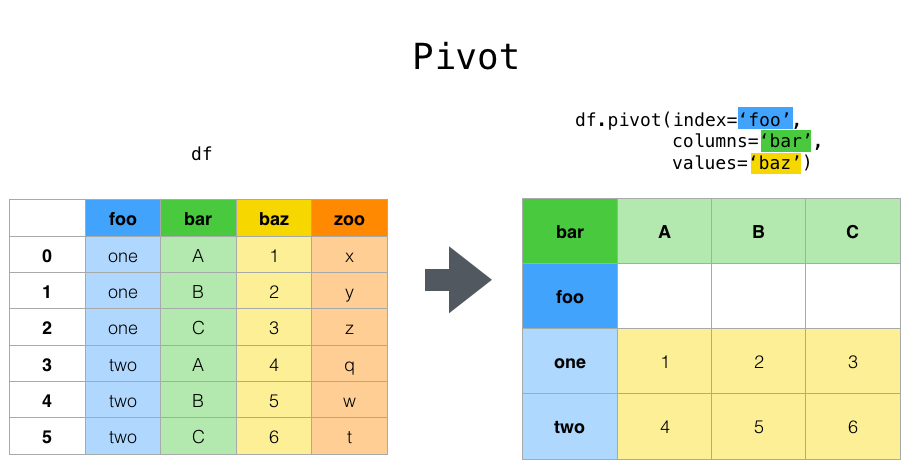

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [90]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [94]:
titanic.groupby(['class', 'sex'])['survived'].aggregate('mean').unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [101]:
titanic.groupby(['sex', 'class','who','adult_male'])['survived'].aggregate('mean').unstack()

adult_male              False     True 
sex    class  who                      
female First  child  0.666667       NaN
              man         NaN       NaN
              woman  0.978022       NaN
       Second child  1.000000       NaN
              man         NaN       NaN
              woman  0.909091       NaN
       Third  child  0.533333       NaN
              man         NaN       NaN
              woman  0.491228       NaN
male   First  child  1.000000       NaN
              man         NaN  0.352941
              woman       NaN       NaN
       Second child  1.000000       NaN
              man         NaN  0.080808
              woman       NaN       NaN
       Third  child  0.321429       NaN
              man         NaN  0.119122
              woman       NaN       NaN

In [104]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### MultiLevel Pivot Table

In [2]:
age=pd.cut(titanic['age'],[0,28,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 28]   0.931034  0.921053  0.520548
       (28, 80]  0.982143  0.916667  0.310345
male   (0, 28]   0.565217  0.227273  0.161290
       (28, 80]  0.346154  0.090909  0.132653

In [6]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838
